In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("Pokemon.csv", encoding="latin1")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           807 non-null    object
 1   Name        807 non-null    object
 2   Type 1      806 non-null    object
 3   Type 2      424 non-null    object
 4   Total       807 non-null    object
 5   HP          806 non-null    object
 6   Attack      807 non-null    object
 7   Defense     807 non-null    object
 8   Sp. Atk     807 non-null    object
 9   Sp. Def     807 non-null    object
 10  Speed       807 non-null    object
 11  Generation  807 non-null    object
 12  Legendary   807 non-null    object
dtypes: object(13)
memory usage: 82.4+ KB


In [83]:
df.describe(include="all")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,807,807,806,424,807,806,807,807,807,807,807,807,807
unique,722,801,19,23,202,97,118,106,108,94,111,8,8
top,479,Ariados,Water,Flying,600,60,100,70,60,80,60,1,FALSE
freq,6,4,112,98,37,67,39,57,53,52,44,165,732


In [84]:
df.tail(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE
806,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
807,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [85]:
# 最后4行无意义，删除
df = df.iloc[:-4, :] 

In [86]:
# 删除全是NaN的行
df[df.isna().all(axis=1)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df = df.dropna(how='all')

In [88]:
# 先枚举第4~12列的列名（假设从0开始计数）
cols_to_check = df.columns[4:13]  # 第4列索引3，第12列索引11

# 找出含有 'undefined' 的行
undefined_rows = df[df[cols_to_check].apply(lambda row: row.str.contains('undefined', na=False)).any(axis=1)]
print("Rows containing 'undefined':")
print(undefined_rows)

# 删除这些行
df = df.drop(index=undefined_rows.index)


Rows containing 'undefined':
       #       Name    Type 1  Type 2 Total  HP Attack Defense Sp. Atk  \
771  695  Heliolisk  Electric  Normal   481  62     55      52     109   

    Sp. Def Speed Generation Legendary  
771      94   109  undefined     FALSE  


<Axes: xlabel='Type 1'>

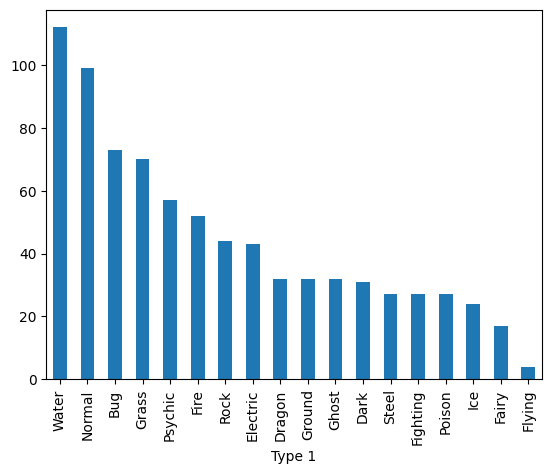

In [89]:
df["Type 1"].value_counts().plot(kind='bar')

<Axes: xlabel='Type 2'>

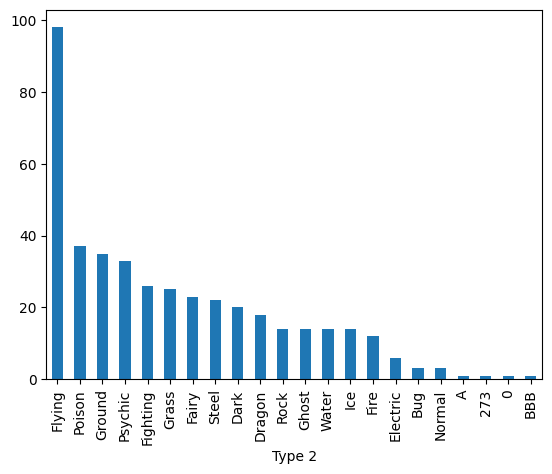

In [90]:
df["Type 2"].value_counts().plot(kind='bar')

In [91]:
# 删除异常取值所在的行
invalid_values = ['A', '273', '0', 'BBB']
invalid_rows = df[df["Type 2"].isin(invalid_values)]
print("Invalid rows:")
print(invalid_rows)

df = df.drop(index=invalid_rows.index)

Invalid rows:
       #                 Name    Type 1 Type 2 Total   HP Attack Defense  \
34    27            Sandshrew    Ground      0   300   50     75      85   
39    32     Nidoranâ?Poison       NaN    273    46   57     40      40   
117  107           Hitmonchan  Fighting      A   455   50    105      79   
428  382  KyogrePrimal Kyogre     Water    BBB   770  100    150      90   

    Sp. Atk Sp. Def Speed Generation Legendary  
34       20      30    40          1     FALSE  
39       40      50     1      FALSE       NaN  
117      35     110    76          1     FALSE  
428     180     160    90          3      TRUE  


In [92]:
df["Type 2"].value_counts()

Type 2
Flying      98
Poison      37
Ground      35
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Bug          3
Normal       3
Name: count, dtype: int64

In [93]:
df[df.duplicated()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,FALSE
23,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,FALSE
185,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE
186,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE
187,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE


In [94]:
df = df.drop_duplicates()

In [95]:
# 获取索引 4~10 的列名
cols_to_convert = df.columns[4:11]
print(cols_to_convert)
# 转换为数值，无法转换的设置为 NaN
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    
# 找出这些列中至少有一个值 <= 0 或为 NaN 的行
invalid_rows = df[(df[cols_to_convert] <= 0).any(axis=1) | df[cols_to_convert].isna().any(axis=1)]
print("Rows with values <= 0 or NaN in numeric stats:")
print(invalid_rows)

# 删除这些行
df = df.drop(index=invalid_rows.index)

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')
Rows with values <= 0 or NaN in numeric stats:
       #      Name Type 1  Type 2  Total    HP  Attack  Defense  Sp. Atk  \
17    13    Weedle    Bug  Poison    195   NaN    35.0       30     20.0   
349  315   Roselia  Grass  Poison    400  50.0    60.0      -10    100.0   
620  554  Darumaka   Fire     NaN    315  70.0    90.0       45     15.0   

     Sp. Def  Speed Generation Legendary  
17      20.0     50          1     FALSE  
349     80.0     65          3     FALSE  
620     45.0    -50          5     FALSE  


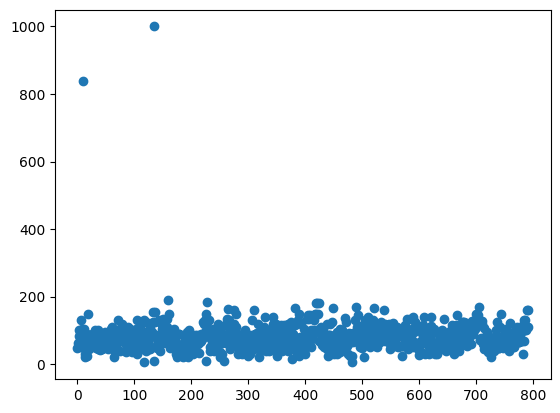

In [96]:
plt.scatter(range(df.shape[0]), df.iloc[:,6])

In [97]:
df = df[df["Attack"] <= 400]

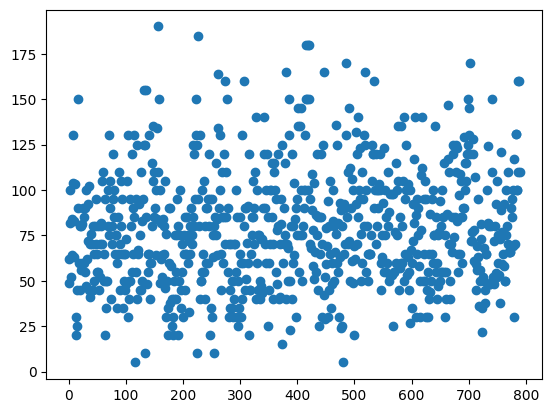

In [98]:
plt.scatter(range(df.shape[0]), df.iloc[:,6])

In [99]:
# 需要检查的列
cols_stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# 找出 Total 不等于 6 个基础属性之和的行
mismatch_rows = df[df['Total'] != df[cols_stats].sum(axis=1)]
print("Rows where Total does not match sum of stats:")
print(mismatch_rows)

# 删除这些行
df = df.drop(index=mismatch_rows.index)

Rows where Total does not match sum of stats:
       #                   Name   Type 1  Type 2  Total     HP  Attack  \
38    31              Nidoqueen   Poison  Ground    505   90.0    92.0   
48    41                  Zubat   Poison  Flying    845   40.0    45.0   
62    55                Golduck    Water     NaN    500  120.0    82.0   
362  326                Grumpig  Psychic     NaN    470   80.0    45.0   
463  412                  Burmy      Bug     NaN    224   40.0    29.0   
766  690                 Skrelp   Poison   Water    320   50.0    60.0   
768  692              Clauncher    Water     NaN    330   50.1    53.0   
786  710  PumpkabooAverage Size    Ghost   Grass    435   49.0    66.0   
793  711    GourgeistSuper Size    Ghost   Grass    494  185.0   100.0   
795  713                Avalugg      Ice     NaN    714   95.0   117.0   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary  
38        87   750.00    85.00     76          1     FALSE  
48        35    3

In [100]:
df["Generation"].value_counts()

Generation
5        164
3        157
1        155
4        120
2        106
6         76
FALSE      2
Name: count, dtype: int64

In [101]:
df["Legendary"].value_counts()

Legendary
FALSE     709
TRUE       64
0           3
1           1
Poison      1
Ground      1
Name: count, dtype: int64

In [102]:
# 找出置换行：Generation 不在 1~6，且 Legendary 是数字字符串
swapped_rows = df[ (~df["Generation"].isin([str(i) for i in range(1,7)])) &
                   (df["Legendary"].str.isdigit()) ]

print("Swapped rows:")
print(swapped_rows)

# 交换两列
df.loc[swapped_rows.index, ["Generation", "Legendary"]] = df.loc[swapped_rows.index, ["Legendary", "Generation"]].values


Swapped rows:
     #       Name    Type 1 Type 2  Total    HP  Attack  Defense  Sp. Atk  \
11   9  Blastoise     Water    NaN    530  79.0    83.0      100     85.0   
32  25    Pikachu  Electric    NaN    320  35.0    55.0       40     50.0   

    Sp. Def  Speed Generation Legendary  
11    105.0     78      FALSE         1  
32     50.0     90      FALSE         0  


In [103]:
df["Generation"].value_counts()

Generation
5    164
3    157
1    156
4    120
2    106
6     76
0      1
Name: count, dtype: int64

In [104]:
df["Legendary"].value_counts()

Legendary
FALSE     711
TRUE       64
0           2
Poison      1
Ground      1
Name: count, dtype: int64

In [105]:
# 找出 Generation 不在 '1'-'6' 的行
invalid_gen = df[~df["Generation"].isin([str(i) for i in range(1,7)])]
print("Rows with invalid Generation:")
print(invalid_gen)

# 删除这些行
df = df.drop(index=invalid_gen.index)

Rows with invalid Generation:
     #     Name    Type 1 Type 2  Total    HP  Attack  Defense  Sp. Atk  \
32  25  Pikachu  Electric    NaN    320  35.0    55.0       40     50.0   

    Sp. Def  Speed Generation Legendary  
32     50.0     90          0     FALSE  


In [106]:
# 找出 Legendary 不为 'TRUE' 或 'FALSE' 的行
invalid_legendary = df[~df["Legendary"].isin(['TRUE','FALSE'])]
print("Rows with invalid Legendary:")
print(invalid_legendary)

# 删除这些行
df = df.drop(index=invalid_legendary.index)

Rows with invalid Legendary:
       #                 Name   Type 1    Type 2  Total    HP  Attack  \
45    38            Ninetales     Fire       NaN    505  73.0    76.0   
78    70           Weepinbell    Grass    Poison    390  65.0    90.0   
115  105              Marowak   Ground       NaN    425  60.0    80.0   
130  119              Seaking    Water       NaN    450  80.0    92.0   
533  475  GalladeMega Gallade  Psychic  Fighting    618  68.0   165.0   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary  
45        75     81.0    100.0    100          1         0  
78        50     85.0     45.0     55          1    Poison  
115      110     50.0     80.0     45          1    Ground  
130       65     65.0     80.0     68          1         0  
533       95     65.0    115.0    110          4       NaN  


In [107]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 0 to 805
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   #           774 non-null    object 
 1   Name        774 non-null    object 
 2   Type 1      774 non-null    object 
 3   Type 2      404 non-null    object 
 4   Total       774 non-null    int64  
 5   HP          774 non-null    float64
 6   Attack      774 non-null    float64
 7   Defense     774 non-null    int64  
 8   Sp. Atk     774 non-null    float64
 9   Sp. Def     774 non-null    float64
 10  Speed       774 non-null    int64  
 11  Generation  774 non-null    object 
 12  Legendary   774 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 84.7+ KB


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,774,774,774,404,774.000000,774.000000,774.000000,774.000000,774.00000,774.000000,774.000000,774,774
unique,699,774,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2
top,479,Bulbasaur,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,FALSE
freq,6,1,107,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164,710
mean,NaN,NaN,NaN,NaN,435.974160,69.483204,79.042636,73.908269,73.21447,71.937984,68.387597,NaN,NaN
std,NaN,NaN,NaN,NaN,119.608998,25.708619,32.465796,31.145622,32.58295,27.724411,29.188279,NaN,NaN
min,NaN,NaN,NaN,NaN,180.000000,1.000000,5.000000,5.000000,10.00000,20.000000,5.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,330.000000,50.000000,55.000000,50.000000,50.00000,50.000000,45.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,450.000000,65.000000,75.000000,70.000000,65.00000,70.000000,65.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,515.000000,80.000000,100.000000,90.000000,95.00000,90.000000,90.000000,NaN,NaN
